In [ ]:
# Import necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
# Read in data from a CSV file and store it in a pandas DataFrame
data = pd.read_csv("sp500_stocks.csv")

In [ ]:
data

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2009-12-31,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0
2,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0
3,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0
4,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0
...,...,...,...,...,...,...,...,...
1593499,2022-07-20,ZTS,176.250000,176.250000,178.179993,175.649994,177.539993,1944300.0
1593500,2022-07-21,ZTS,180.600006,180.600006,180.750000,175.770004,175.770004,1878400.0
1593501,2022-07-22,ZTS,178.179993,178.179993,181.160004,177.259995,180.259995,1224500.0
1593502,2022-07-25,ZTS,175.179993,175.179993,178.699997,174.089996,178.009995,1291300.0


In [ ]:
data.isnull().sum()

Date             0
Symbol           0
Adj Close    71167
Close        71167
High         71167
Low          71167
Open         71167
Volume       71167
dtype: int64

In [ ]:
import pandas as pd

# Specify the columns with null values to check
columns_to_check = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# Fill missing values in the specified columns with the mean
data.fillna(data[columns_to_check].mean(), inplace=True)

# Print the number of null values in each column after filling
print(data.isnull().sum())

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [ ]:
data.isnull().sum()

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
# Extract date components
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek

In [ ]:
data['Year']

0          2009
1          2010
2          2010
3          2010
4          2010
           ... 
1593499    2022
1593500    2022
1593501    2022
1593502    2022
1593503    2022
Name: Year, Length: 1593504, dtype: int32

In [ ]:
data

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Year,Month,Day,DayOfWeek
0,2009-12-31,MMM,88.157827,94.064175,95.102574,92.973883,94.052471,5.819381e+06,2009,12,31,3
1,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3.043700e+06,2010,1,4,0
2,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2.847000e+06,2010,1,5,1
3,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5.268500e+06,2010,1,6,2
4,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4.470100e+06,2010,1,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1593499,2022-07-20,ZTS,176.250000,176.250000,178.179993,175.649994,177.539993,1.944300e+06,2022,7,20,2
1593500,2022-07-21,ZTS,180.600006,180.600006,180.750000,175.770004,175.770004,1.878400e+06,2022,7,21,3
1593501,2022-07-22,ZTS,178.179993,178.179993,181.160004,177.259995,180.259995,1.224500e+06,2022,7,22,4
1593502,2022-07-25,ZTS,175.179993,175.179993,178.699997,174.089996,178.009995,1.291300e+06,2022,7,25,0


In [ ]:
# Retrieve the column names of the pandas DataFrame
data.columns

Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Year', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')

In [ ]:
# Display the first 5 rows of the pandas DataFrame to preview the data
data.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Year,Month,Day,DayOfWeek
0,2009-12-31,MMM,88.157827,94.064175,95.102574,92.973883,94.052471,5.819381e+06,2009,12,31,3
1,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3.043700e+06,2010,1,4,0
2,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2.847000e+06,2010,1,5,1
3,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5.268500e+06,2010,1,6,2
4,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4.470100e+06,2010,1,7,3


In [ ]:
# Display the last 5 rows of the pandas DataFrame to preview the data
data.tail()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Year,Month,Day,DayOfWeek
1593499,2022-07-20,ZTS,176.250000,176.250000,178.179993,175.649994,177.539993,1944300.0,2022,7,20,2
1593500,2022-07-21,ZTS,180.600006,180.600006,180.750000,175.770004,175.770004,1878400.0,2022,7,21,3
1593501,2022-07-22,ZTS,178.179993,178.179993,181.160004,177.259995,180.259995,1224500.0,2022,7,22,4
1593502,2022-07-25,ZTS,175.179993,175.179993,178.699997,174.089996,178.009995,1291300.0,2022,7,25,0
1593503,2022-07-26,ZTS,176.380005,176.380005,176.750000,173.960007,174.880005,1354900.0,2022,7,26,1


In [ ]:
# some information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593504 entries, 0 to 1593503
Data columns (total 12 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date       1593504 non-null  datetime64[ns]
 1   Symbol     1593504 non-null  object        
 2   Adj Close  1593504 non-null  float64       
 3   Close      1593504 non-null  float64       
 4   High       1593504 non-null  float64       
 5   Low        1593504 non-null  float64       
 6   Open       1593504 non-null  float64       
 7   Volume     1593504 non-null  float64       
 8   Year       1593504 non-null  int32         
 9   Month      1593504 non-null  int32         
 10  Day        1593504 non-null  int32         
 11  DayOfWeek  1593504 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(4), object(1)
memory usage: 121.6+ MB


In [ ]:
# some statistical information about data
data.describe()

,Date,Adj Close,Close,High,Low,Open,Volume,Year,Month,Day,DayOfWeek
count,1593504,1.593504e+06,1.593504e+06,1.593504e+06,1.593504e+06,1.593504e+06,1.593504e+06,1.593504e+06,1.593504e+06,1.593504e+06,1.593504e+06
mean,2016-04-13 05:05:54.545454592,8.815783e+01,9.406417e+01,9.510257e+01,9.297388e+01,9.405247e+01,5.819381e+06,2.015791e+03,6.430556e+00,1.570928e+01,2.020202e+00
min,2009-12-31 00:00:00,7.000000e-01,7.000000e-01,7.100000e-01,6.500000e-01,7.000000e-01,0.000000e+00,2.009000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,2013-02-24 06:00:00,3.028878e+01,3.560000e+01,3.599000e+01,3.519000e+01,3.559000e+01,1.020000e+06,2.013000e+03,3.000000e+00,8.000000e+00,1.000000e+00
50%,2016-04-14 12:00:00,5.516085e+01,6.240000e+01,6.300000e+01,6.173000e+01,6.238000e+01,2.265600e+06,2.016000e+03,6.000000e+00,1.600000e+01,2.000000e+00
75%,2019-06-04 06:00:00,9.286115e+01,1.001100e+02,1.011200e+02,9.903000e+01,1.000700e+02,5.634400e+06,2.019000e+03,9.000000e+00,2.300000e+01,3.000000e+00
max,2022-07-26 00:00:00,5.959330e+03,5.959330e+03,5.982450e+03,5.884060e+03,5.977610e+03,1.880998e+09,2.022000e+03,1.200000e+01,3.100000e+01,4.000000e+00
std,NaN,1.615738e+02,1.613640e+02,1.634074e+02,1.592588e+02,1.613455e+02,1.956465e+07,3.631645e+00,3.418918e+00,8.745045e+00,1.399485e+00


## LSTM Model

In [ ]:
# Choose the features you want to use for prediction
features = data[['High', 'Low', 'Open', 'Volume', 'Year', 'Month', 'Day', 'DayOfWeek', 'Adj Close']]

In [ ]:
# Scale the features to the range [0, 1]
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [ ]:
# Define the target variable (what you want to predict)
target = data['Close']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

In [ ]:
# Reshape the data for the RNN model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Build the RNN model with dropout and early stopping
model = keras.Sequential()
model.add(layers.LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(50, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

C:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model with a larger batch size
history = model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])

39838/39838 ━━━━━━━━━━━━━━━━━━━━ 180s 4ms/step - loss: 5469.1470 - mae: 29.2083 - val_loss: 208.0331 - val_mae: 10.5500


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

9960/9960 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 208.03323274531425


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9730586127847668


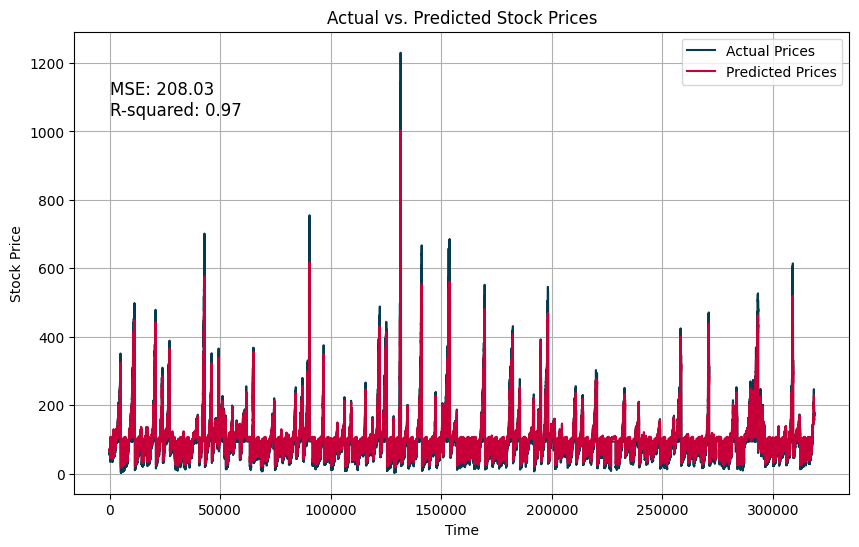

In [ ]:
# Assuming you have actual stock prices in y_test and predicted prices in y_pred
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Create a line chart to visualize the actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Prices", color="#053B50")
plt.plot(y_pred, label="Predicted Prices", color="#C70039")
plt.title("Actual vs. Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)

# Display the MSE and R2 as text in the plot
plt.text(100, max(y_test) * 0.9, f"MSE: {mse:.2f}", fontsize=12, color="black")
plt.text(100, max(y_test) * 0.85, f"R-squared: {r2:.2f}", fontsize=12, color="black")

# Show the plot
plt.show()